# Final Project Submission

* Student name: Heath Rittler
* Student pace: Self paced
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL: https://medium.com/@heathlikethecandybar/

# Introduction

## Business Case/ Summary

SyriaTel, a telecommunications company wants to identify the leading factors of why a customer cancels their service.  This is also referred to as 'Churn.'  If they understand the factors that lead to churn, the company can implement programs to reduce the risk of churn, and increase the lifetime value of and for their customers.

My goal is to build a classifer to predict whether a customer will stop doing business with SyriaTel using information such as usage, interactions with SyriaTel, and certain features that the customer has purchased.  I am mostly focused on reducing the rate of false negatives.

## Core Field Names and Definitions from Data Source

https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset

* `state`- The state in which the account owner resides.
* `account length` - 
* `area code` - Primary 3 digit area of the line for the account.
* `phone number` - Primary 7 digit area of the line for the account.
* `international plan` - Indicator denoting whether or not the account has an international feature.
* `voice mail plan` - Indicator denoting whether or not the account has an voice mail feature.
* `number vmail messages` - Usage metric counting the total number of voicemails for the phone number in question.
* `total day minutes` - Usage metric indicating how many minutes (call time) were used between 6:00am and 5:00pm.
* `total day calls` - Usage metric indicating how many calls were used between 6:00am and 5:00pm. 
* `total day charge` - Usage metric indicating how much the user was charged for their usage between 6:00am and 5:00pm.
* `total eve minutes` - Usage metric indicating how many minutes (call time) were used between 5:01pm and 8:00pm.
* `total eve calls` - Usage metric indicating how many calls were used between 5:01pm and 8:00pm. 
* `total eve charge` - Usage metric indicating how much the user was charged for their usage between 5:01pm and 8:00pm.
* `total night minutes` - Usage metric indicating how many minutes (call time) were used between 8:01pm and 5:59am.
* `total night calls` - Usage metric indicating how many calls were used between 8:01pm and 5:59am.
* `total night charge` - Usage metric indicating how much the user was charged for their usage between 8:01pm and 5:59a.
* `total intl minutes` - Usage metric indicating how many minutes (call time) were used internationally.
* `total intl calls` - Usage metric indicating how many calls were made internationally.
* `total intl charge` - Usage metric indicating how much the user was charged for their international call usage.
* `customer service calls` - The total number of customer service calls made by the user to the Skyvia Customer Service line.
* `churn` - Our target category indicating whether or not the customer churned/ cancelled their plan.

# Data Load, Cleaning

## Importing Packages

In [108]:
# Importing packages for analysis

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

import xgboost

lr = LinearRegression()
plt.style.use('seaborn-talk')
import sklearn.metrics as metrics


%matplotlib inline

## Choosing Colors & Templates

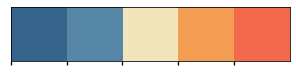

In [109]:
# Choosing standard colors for project

pal = ['#37648C',
        '#5687A6',
        '#F2E4BB',
        '#F29D52',
        '#F26A4B']

color_codes = ['darkblue', 'blue', 'beige', 'orange', 'redorange']

c = lambda x: pal[color_codes.index(x)]

sns.palplot(sns.color_palette(pal))

div = []

## Import data

In [110]:
# Importing data and viewing the first 5 rows

df = pd.read_csv('data/data.csv')

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [111]:
# Updating column names to have an _ vs a space

df.columns = [c.replace(' ', '_') for c in df.columns]

In [112]:
# Taking a quick peak at our datatypes for any transformations needed.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

Looks like we have a few categorical variables in which we will need to encode.  We'll look at that here in a bit.  First I want to make sure our dataset is complete. Moving on to checking to see if we need to remove or impute any data before any transformations.

In [113]:
# Checking for missing values.

df.isna().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

No missing values. Going to create some columns to add together all of our minutes, calls, and charges.  We might be able to reduce the number of dimensions we have if the customer is not using the plan at all.  We may drop these later, but let's add them while we are in the mood.

In [114]:
# Adding column for total calls

df['total_calls'] = (df['total_day_calls'] +
                    df['total_eve_calls'] + 
                    df['total_night_calls'] + 
                    df['total_intl_calls']
                    )

In [115]:
# Adding column for total minutes

df['total_charges'] = (df['total_day_charge'] + 
                    df['total_eve_charge'] + 
                    df['total_night_charge'] + 
                    df['total_intl_charge']
                      )

In [116]:
# Adding column for total charges

df['total_minutes'] = (df['total_day_minutes'] + 
                    df['total_eve_minutes'] + 
                    df['total_night_minutes'] + 
                    df['total_intl_minutes']
                      )

In [117]:
# Adding column for price per minute

df['price_per_minute'] = df['total_day_charge']/df['total_minutes']

In [118]:
# Quick check to make sure our columns were added correctly and math checks out

df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_calls,total_charges,total_minutes,price_per_minute
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,11.01,10.0,3,2.70,1,False,303,75.56,717.2,0.062842
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,11.45,13.7,3,3.70,1,False,332,59.24,625.2,0.043938
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,7.32,12.2,5,3.29,0,False,333,62.29,539.4,0.076715
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,8.86,6.6,7,1.78,2,False,255,66.80,564.8,0.090120
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,8.41,10.1,3,2.73,3,False,359,52.09,512.0,0.055352


Calculations are looking good.  These will primarily serve as EDA helper stats.  Since they are formulas based on existing fields, I would assume that we will see a high level of colinearity within these added metrics.

In [119]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_calls,total_charges,total_minutes,price_per_minute
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,305.137114,59.449754,591.864776,0.051355
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,34.448164,10.502261,89.954251,0.013085
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,191.000000,22.930000,284.300000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,282.000000,52.380000,531.500000,0.042939
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,305.000000,59.470000,593.600000,0.051557
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,328.000000,66.480000,652.400000,0.060121
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,416.000000,96.150000,885.000000,0.096748


## Features of the cell phone plan EDA

At first glance, our data seems to be pretty well distributed within our numeric columns.  This is evidenced by the closeness between our mean and median values.  Since we know that our target variable is imbalanced (churn accounts for roughly 15% of the total dataset).  There are only a few other features that are tied to the account besides the usage, and those are voice_mail_plan, international_plan, and customer_service_calls.  Let's dig into those next!

There are 323 accounts that purchased a international plan (roughly 10% of customers.). Going to take a look to see if churn within the international accounts is similar to those accounts that did not purchase international plans.

In [120]:
# Checking our target/ dataset for balance before creating our baseline classifcation model.

pd.pivot_table(df, 
               values='account_length', 
               index='international_plan', 
               columns='churn',
               aggfunc='count'
              )


churn,False,True
international_plan,,
no,2664,346
yes,186,137


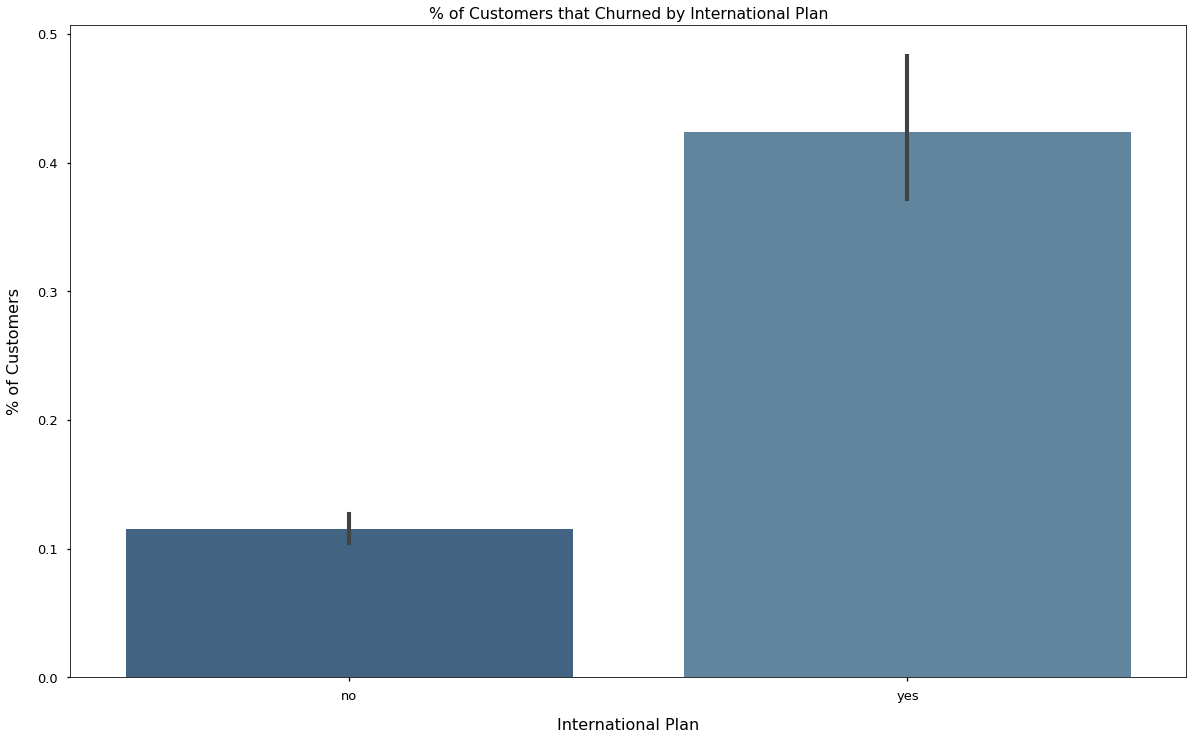

In [121]:
fix, ax = plt.subplots(figsize=(20,12))

sns.barplot(x='international_plan', y='churn', data=df, palette=pal)

ax.set_title('% of Customers that Churned by International Plan')
ax.set_xlabel('International Plan', labelpad=15, fontsize=16)
ax.set_ylabel('% of Customers', labelpad= 15, fontsize=16)

plt.show()

International plans experience a higher churn percentage than those without; just over 40% of those that had the interntational plan, and about 10% for those without.  About 1/3 of the total churn that was experienced were customers that had purchased the international plan.


In [122]:
# Creating pivot table for voice mail plan vs churn.

pd.pivot_table(df, 
               values='account_length', 
               index='voice_mail_plan', 
               columns='churn',
               aggfunc='count'
              )

churn,False,True
voice_mail_plan,,
no,2008,403
yes,842,80


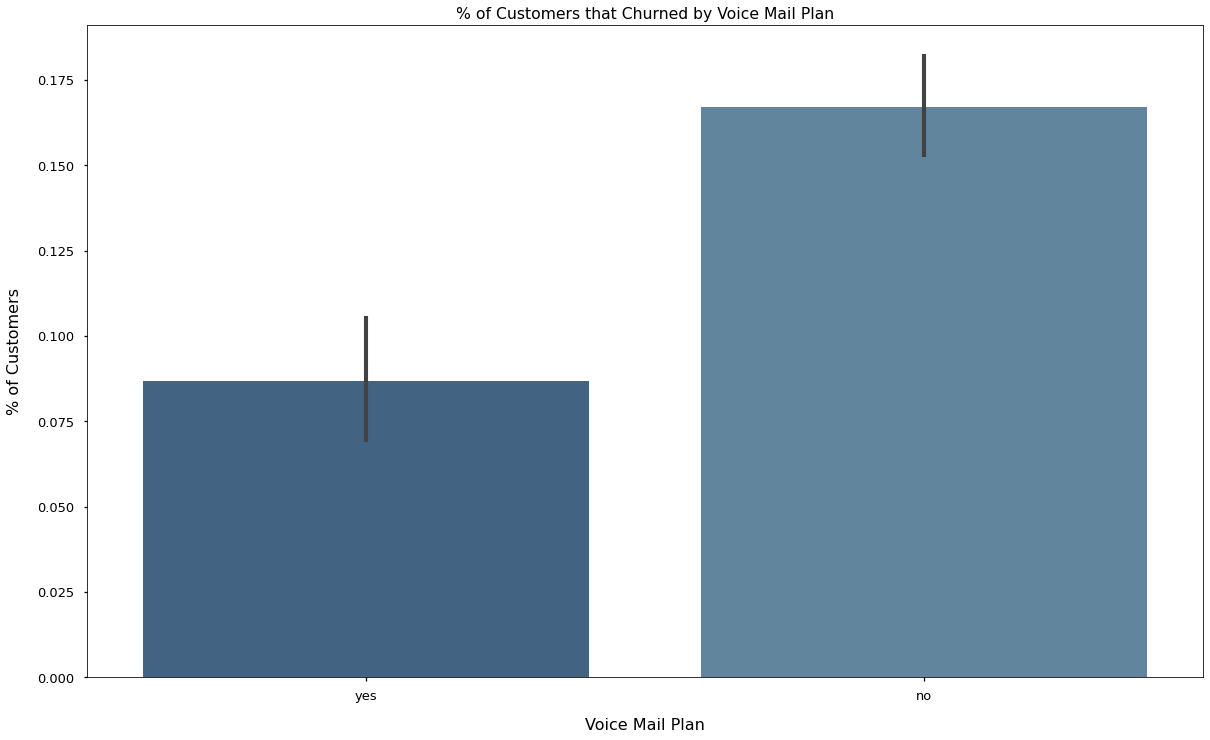

In [123]:
# Creating visual to display numbers from above

fix, ax = plt.subplots(figsize=(20,12))

sns.barplot(x='voice_mail_plan', y='churn', data=df, palette=pal)

ax.set_title('% of Customers that Churned by Voice Mail Plan')
ax.set_xlabel('Voice Mail Plan', labelpad=15, fontsize=16)
ax.set_ylabel('% of Customers', labelpad= 15, fontsize=16)

plt.show()

Looks like those plans with a voice mail plan have a lower churn percentage than those without. 10% of those with the voice mail plan vs 20% of those without a voice mail plan churn.  We will keep this in mind as we complete our analyses.  So as of right now, it would suffice us to say that customers with the voicemail plan were more satisfied than those customers without that feature.


In [124]:
pd.pivot_table(df, 
               values='account_length', 
               index=['voice_mail_plan', 'international_plan'],
               columns='churn',
               aggfunc='count'
              )

churn                               False  True 
voice_mail_plan international_plan              
no              no                   1878    302
                yes                   130    101
yes             no                    786     44
                yes                    56     36

So between our two features above, it looks like:

No voice mail plan & no interntational plan = 14% churn
No voice mail plan & interntational plan = 44% churn
Voice mail plan & no international plan = 5% churn
Voice mail plan & international plan = 39% churn


So customers that had the voice mail plan & no international plan, or no features at all performed be best (5%, and 14% respectively).  Again, this could mean that the service of the international plan does meet the expectations of the customers.  With that being said, the voice mail feature/ functionality does generally pretty well, and customers see the value in that feature.

In [125]:
pd.pivot_table(df, 
               values='price_per_minute', 
               index=['voice_mail_plan', 'international_plan'],
               columns='churn',
               aggfunc=np.mean
              )

churn                                  False     True 
voice_mail_plan international_plan                    
no              no                  0.050518  0.055644
                yes                 0.053261  0.053121
yes             no                  0.051141  0.049108
                yes                 0.051807  0.053927

Now taking a look at the average price paid per minute between the same feature diagram we looked at above, it looks like those plans with the international plan pay more on average than those without.

Here is the comparison of price between the churn, and non-churn groups that we looked at above:

No voice mail plan & no interntational plan = 14% churn, 10% higher cost
No voice mail plan & interntational plan = 44% churn, 0% difference
Voice mail plan & no international plan = 5% churn, -4% difference
Voice mail plan & international plan = 39% churn, 4% higher cost

This would indicate that there really isn't much price difference when looking at the per minute costs for these additional features.  Or at least the customers that churned weren't paying that much more than the customers that were retained, providing support for the fact that those features value were really based on if they worked or not.

## Demographics EDA

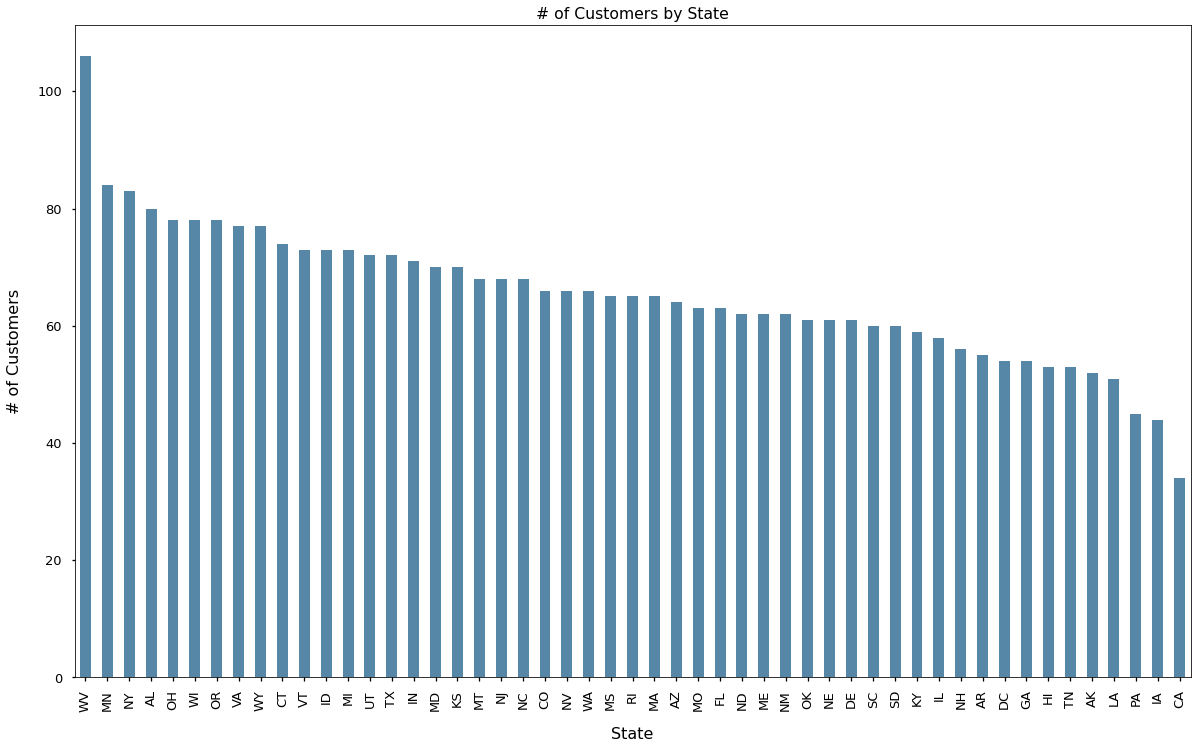

In [126]:
fix, ax = plt.subplots(figsize=(20,12))

df['state'].value_counts().plot(kind='bar', color=c('blue'))

ax.set_title('# of Customers by State')
ax.set_xlabel('State', labelpad=15, fontsize=16)
ax.set_ylabel('# of Customers', labelpad= 15, fontsize=16)

plt.show()

Overall the distribution of states is pretty good!  No concerns here, however we will need to encode this categorical column if we want to retain this information.

In [127]:
# Since we are thinking about dropping our state column, we still have area_code, and our phone_number_prefix,
# to give us an idea of where the users are located.  Going to split those columns out from the line_number,
# which won't really help us.

df[['phone_number_prefix','line_number']] = df.phone_number.str.split("-",expand=True,).astype(int)
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_calls,total_charges,total_minutes,price_per_minute,phone_number_prefix,line_number
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,3,2.70,1,False,303,75.56,717.2,0.062842,382,4657
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,3,3.70,1,False,332,59.24,625.2,0.043938,371,7191
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,5,3.29,0,False,333,62.29,539.4,0.076715,358,1921
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,7,1.78,2,False,255,66.80,564.8,0.090120,375,9999
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,3,2.73,3,False,359,52.09,512.0,0.055352,330,6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,6,2.67,2,False,292,60.10,660.7,0.040185,414,4276
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,4,2.59,3,False,239,63.53,585.4,0.067117,370,3271
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,6,3.81,2,False,264,67.74,675.6,0.045500,328,8230
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,10,1.35,2,False,336,57.53,517.6,0.070228,364,6381


In [128]:
# dropping state, and phone number

df = df.drop(['phone_number', 
              'line_number',
              'state'
             ], 
             axis=1
            )

In [129]:
# Going back to look at our columns that need transformed from string to integer // international plan

df = df.replace({'international_plan': 
                 {'yes': 1, 
                  'no': 0
                 }
                }
               )

In [130]:
# Going back to look at our columns that need transformed from string to integer // voice mail plan

df = df.replace({'voice_mail_plan': 
                 {'yes': 1, 
                  'no': 0
                 }
                }
               )

In [131]:
# Going back to look at our columns that need transformed from string to integer // voice mail plan

df['churn'] = df['churn'].astype(int)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

## Usage EDA

In [133]:
df.groupby(['churn']).mean()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_calls,total_charges,total_minutes,price_per_minute,phone_number_prefix
churn,,,,,,,,,,,,,,,,,,,,,
0,100.793684,437.074737,0.065263,0.295439,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,...,9.006074,10.158877,4.532982,2.743404,1.449825,304.912982,58.448807,584.511123,0.050840,374.008421
1,102.664596,437.817805,0.283644,0.165631,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,...,9.235528,10.700000,4.163561,2.889545,2.229814,306.459627,65.355963,635.255901,0.054393,374.463768


In [134]:
df_churn = df[df['churn'] == True]
df_active = df[df['churn'] == False]

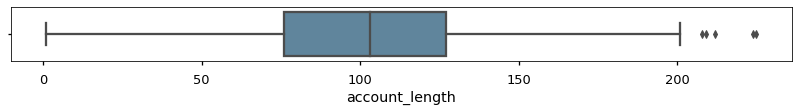

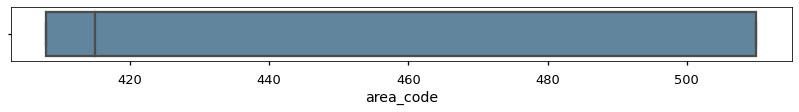

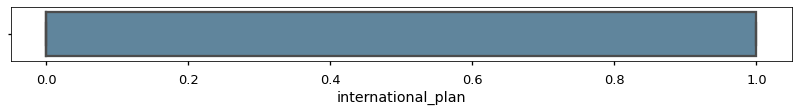

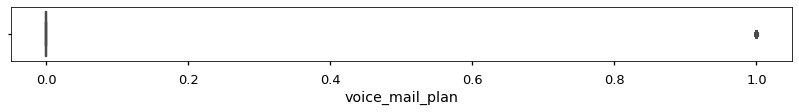

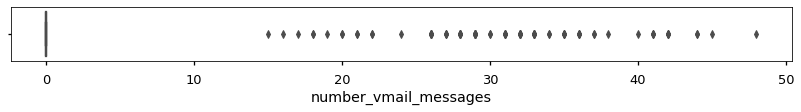

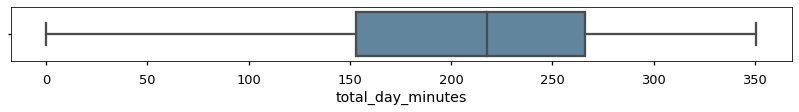

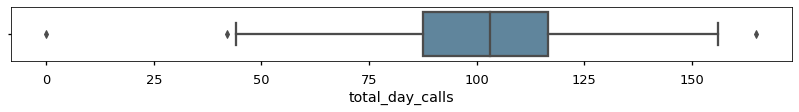

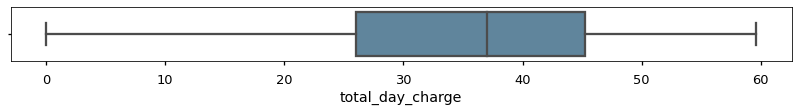

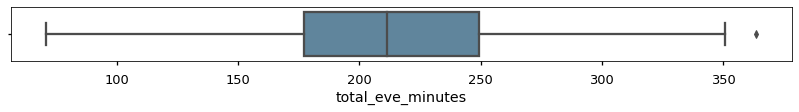

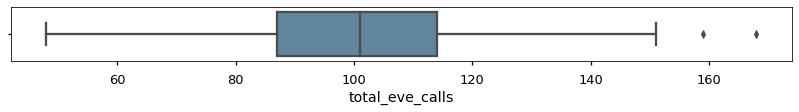

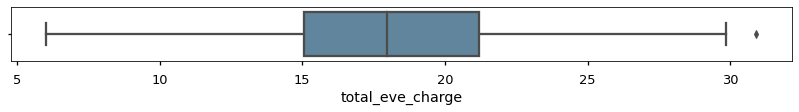

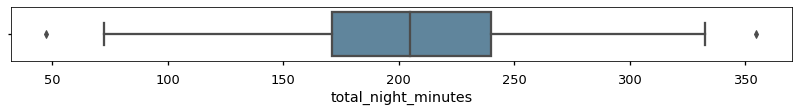

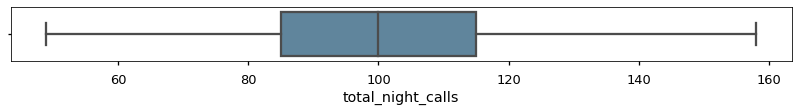

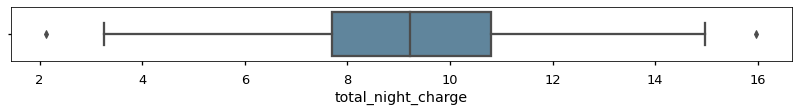

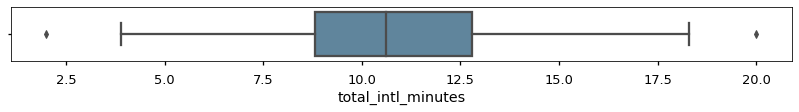

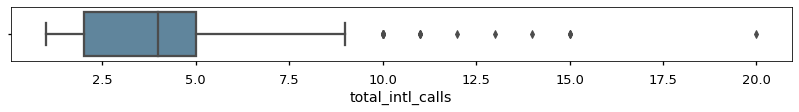

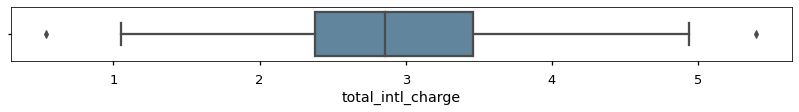

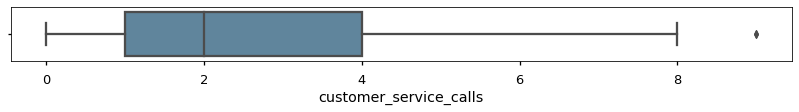

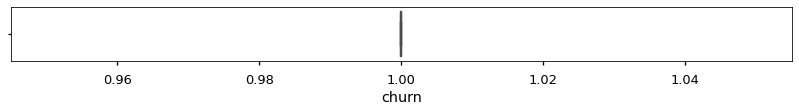

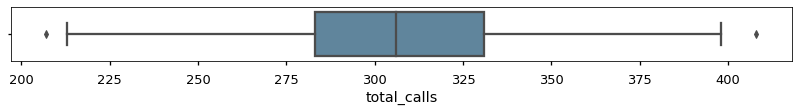

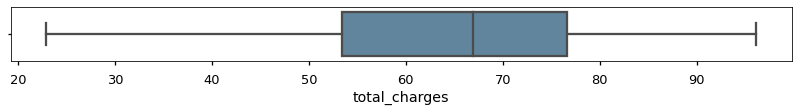

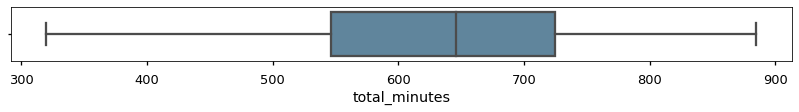

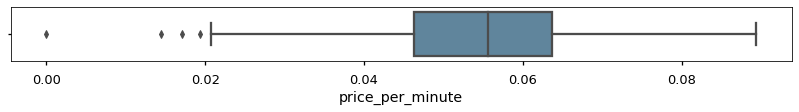

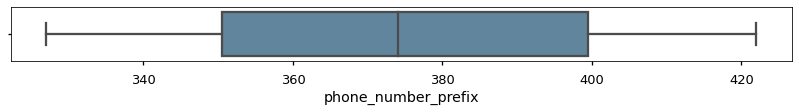

In [135]:
plt.rcParams['figure.max_open_warning'] = 0;

for column in df:
        plt.figure(figsize=(14,1))
        sns.boxplot(data=df_churn, x=column, color=c("blue"))


In [136]:
def mini_bar(x, y, y_title, x_title, plot_title):
    mean_df = df[[x, y]].groupby(x, as_index=False).mean()
    print(mean_df)

    #Bar plot to visualize!
    ax = sns.barplot(x=x, y=y, data=mean_df, palette='winter_r')
    ax.figure.set_size_inches(12,8)
    ax.set_ylabel(y_title)
    ax.set_xlabel(x_title)
    ax.set_title(plot_title)

   churn  price_per_minute
0      0          0.050840
1      1          0.054393


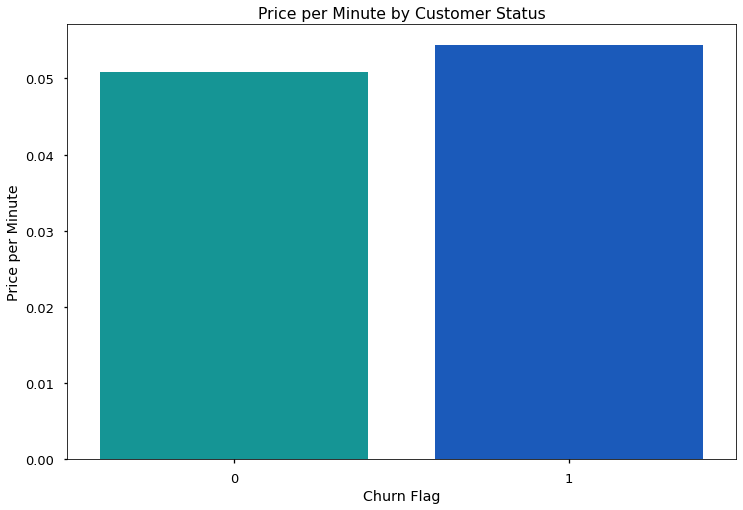

In [137]:
mini_bar('churn', 'price_per_minute', 'Price per Minute', 'Churn Flag', 'Price per Minute by Customer Status');

Churned customers paid 7% more per minute than customers that were retained.  Not sure why that might be the case, but could be a result of customers with the international plan included.

   churn  total_day_minutes
0      0         175.175754
1      1         206.914079


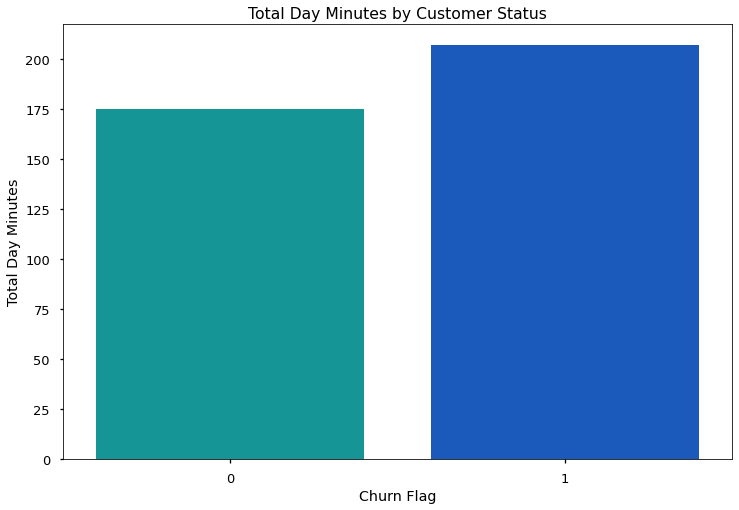

In [138]:
mini_bar('churn', 'total_day_minutes', 'Total Day Minutes', 'Churn Flag', 'Total Day Minutes by Customer Status');

   churn  customer_service_calls
0      0                1.449825
1      1                2.229814


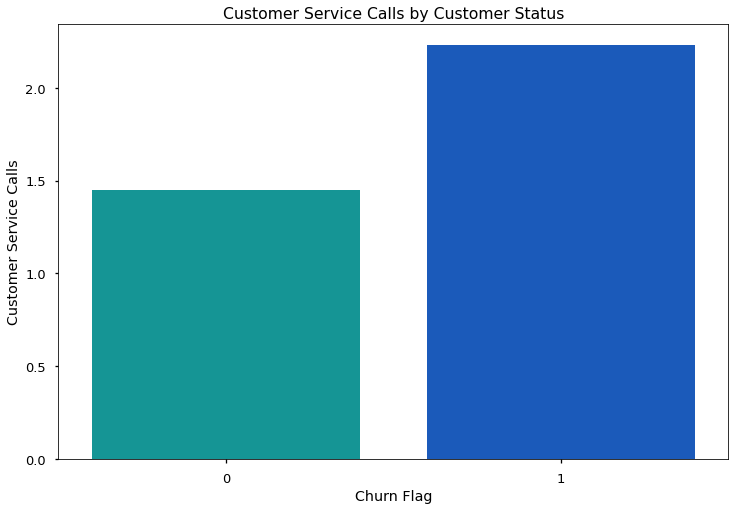

In [139]:
mini_bar('churn', 'customer_service_calls', 'Customer Service Calls', 'Churn Flag', 'Customer Service Calls by Customer Status');

   churn  total_intl_calls
0      0          4.532982
1      1          4.163561


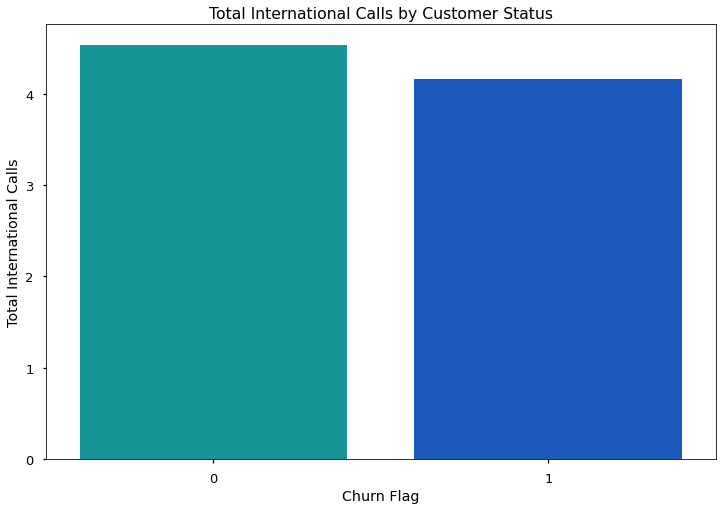

In [140]:
mini_bar('churn', 'total_intl_calls', 'Total International Calls', 'Churn Flag', 'Total International Calls by Customer Status');

   churn  total_night_minutes
0      0           200.133193
1      1           205.231677


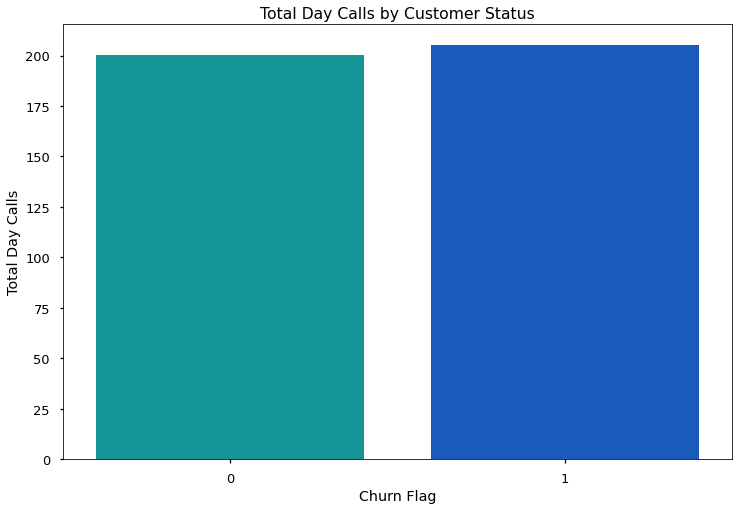

In [141]:
mini_bar('churn', 'total_night_minutes', 'Total Day Calls', 'Churn Flag', 'Total Day Calls by Customer Status');

## Distribution, Linearity, Correlation EDA

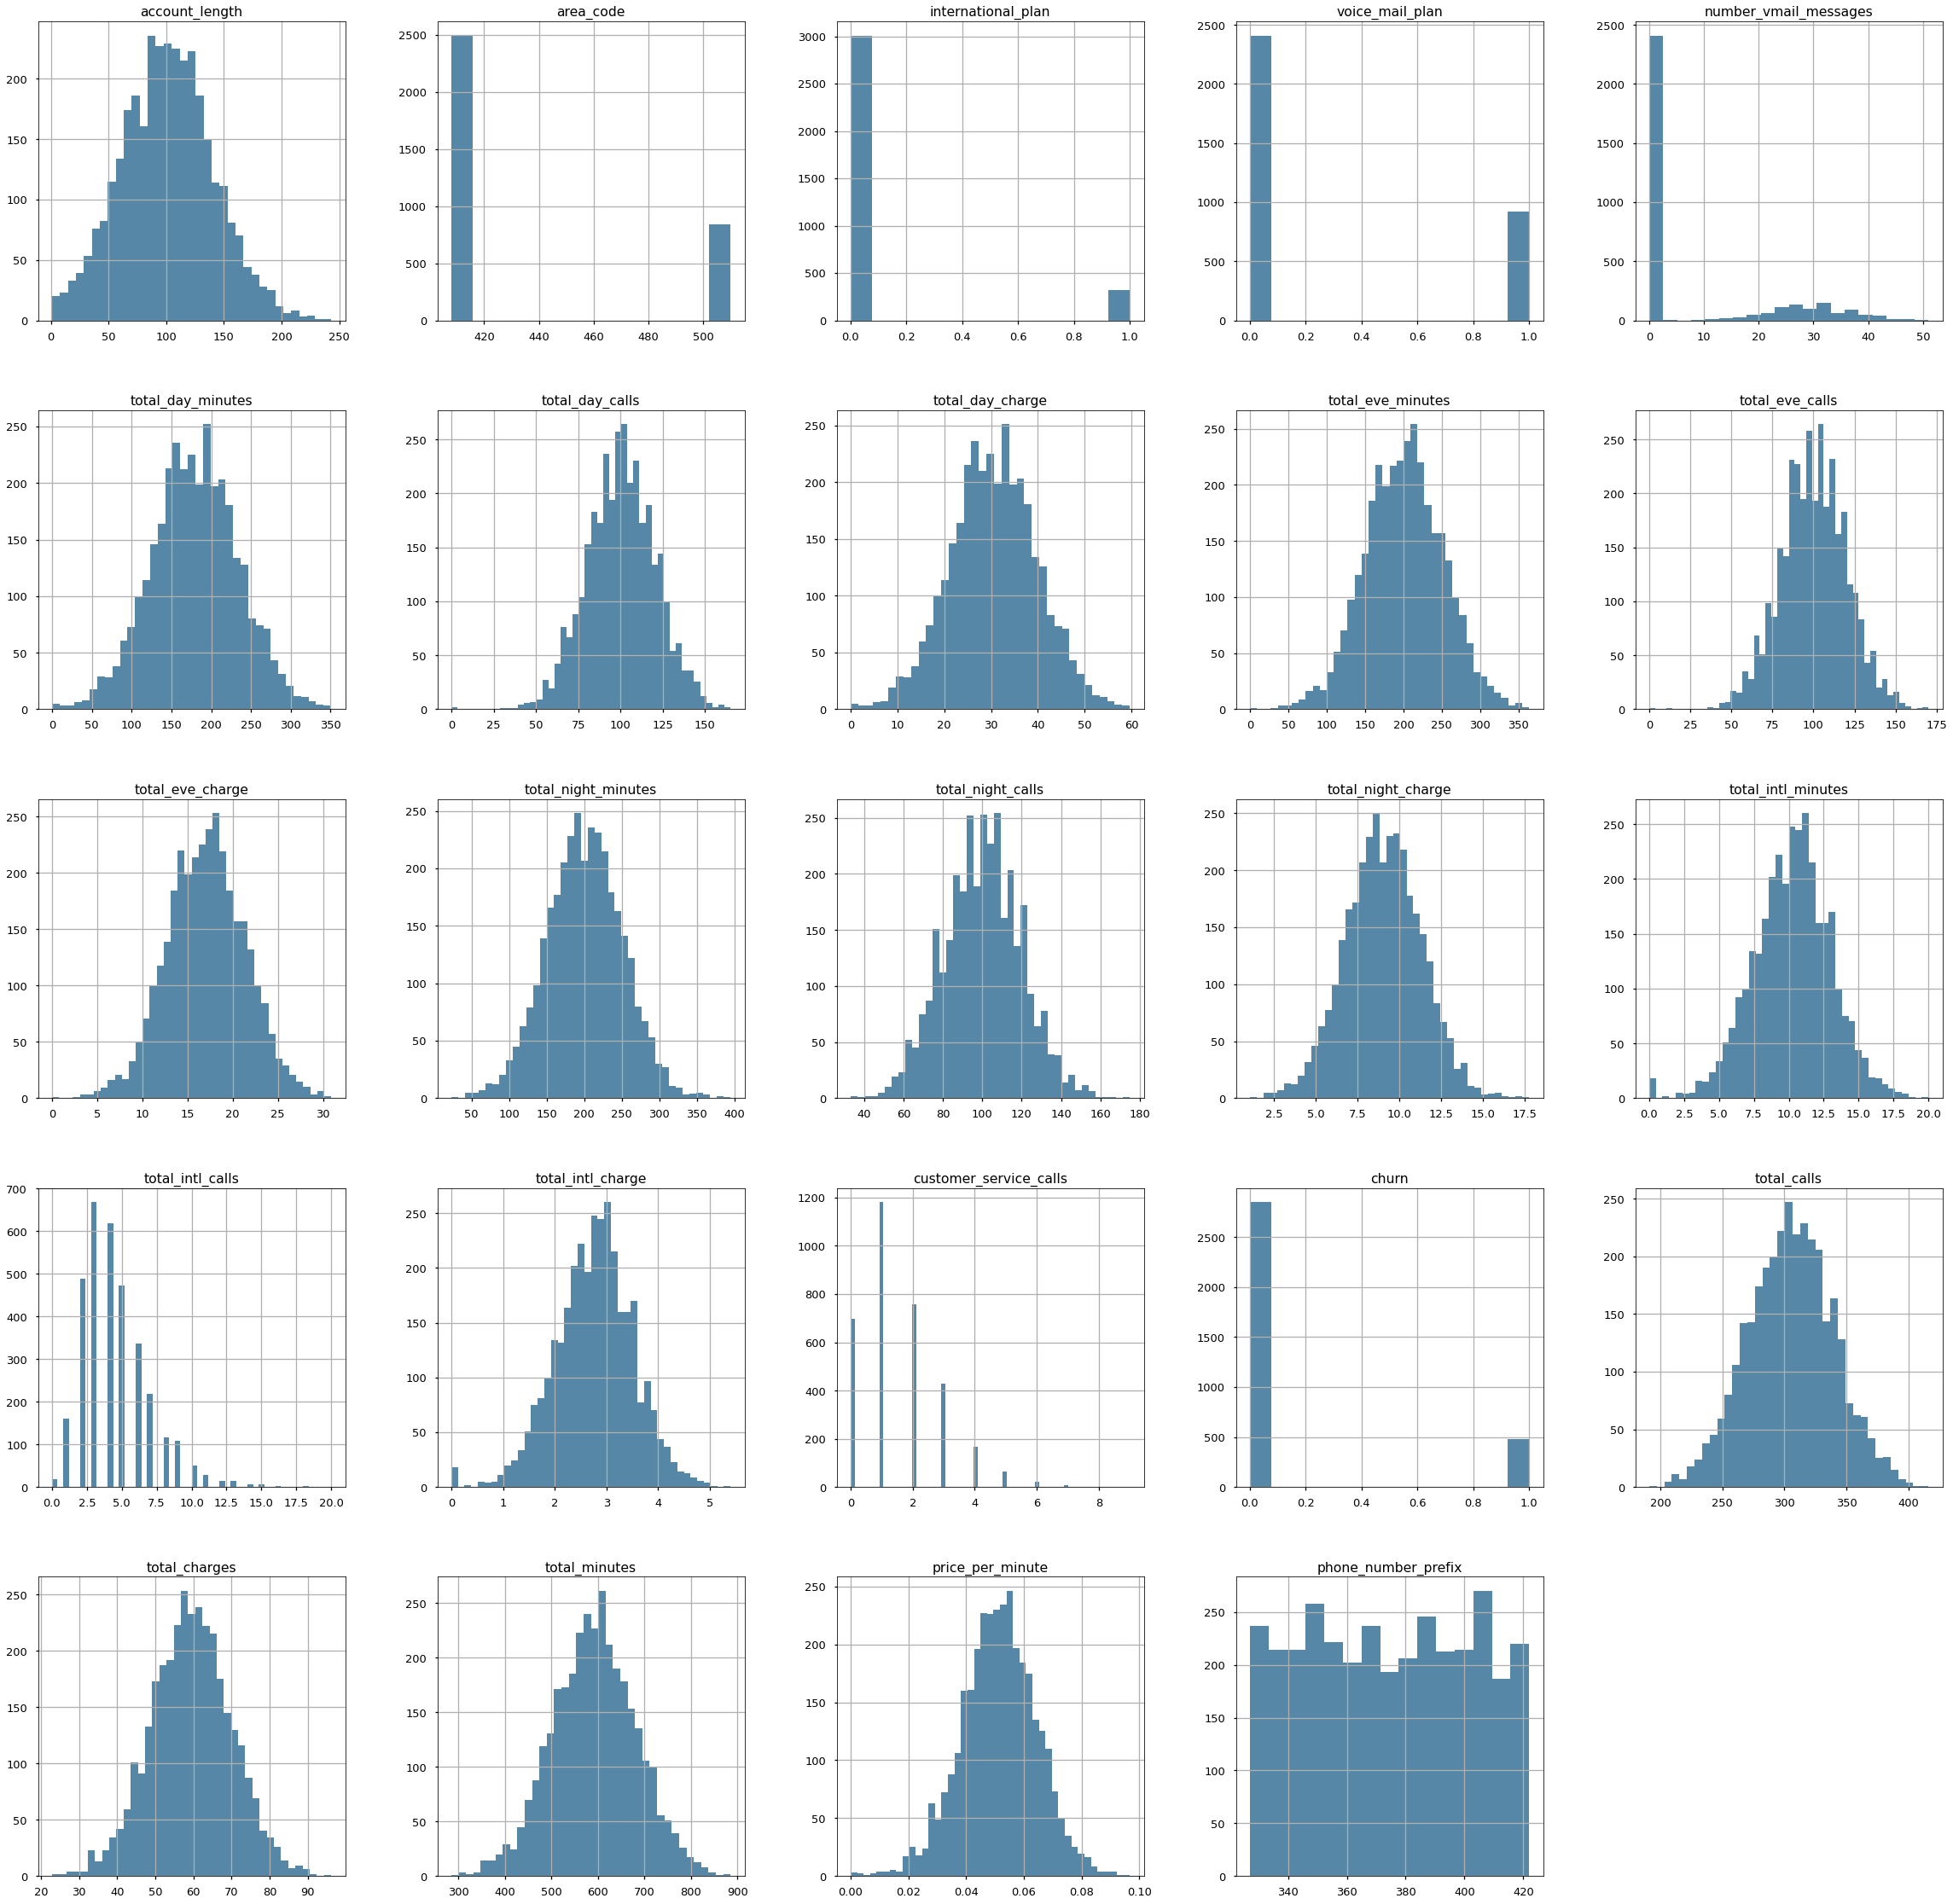

In [142]:
# Going to look at overall distribution and histograms to visually inspect our data

df.hist(bins='auto', 
        figsize=(40,40),
        color=c('blue')
       );

These look great.  Reminds me of why I choose this dataset in the first place!

In [143]:
# Before summarizing the table above, I am going to take a peek at the area code column vs the prefix columns.

df['area_code'].value_counts()


pd.pivot_table(df, 
               values='account_length', 
               index='area_code', 
               columns='phone_number_prefix',
               aggfunc='count'
              )

phone_number_prefix,327,328,329,330,331,332,333,334,335,336,...,413,414,415,416,417,418,419,420,421,422
area_code,,,,,,,,,,,,,,,,,,,,,
408,3,9,9,5,6,12,13,11,10,14,...,6,4,10,10,15,6,6,9,5,7
415,10,12,17,20,10,21,25,20,16,20,...,12,15,21,22,21,21,13,18,13,9
510,6,11,11,9,9,11,8,7,8,7,...,10,10,5,5,10,5,8,8,6,3


We only have 3 area codes for the all the prefixes that we see.  We may want to encode this category since it is categorical feature.  I will also encode the phone number prefix, and the state columns before running any models.  Going to continue to review.

In [144]:
# Updating international and voicemail indicators to boolean, and area code and phone_num prefix to strings

df['area_code'] = df['area_code'].astype(str)
df['phone_number_prefix'] = df['phone_number_prefix'].astype(str)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   object 
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

In [145]:
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_calls,total_charges,total_minutes,price_per_minute,phone_number_prefix
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,10.0,3,2.70,1,0,303,75.56,717.2,0.062842,382
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,13.7,3,3.70,1,0,332,59.24,625.2,0.043938,371
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,12.2,5,3.29,0,0,333,62.29,539.4,0.076715,358
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,6.6,7,1.78,2,0,255,66.80,564.8,0.090120,375
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,10.1,3,2.73,3,0,359,52.09,512.0,0.055352,330


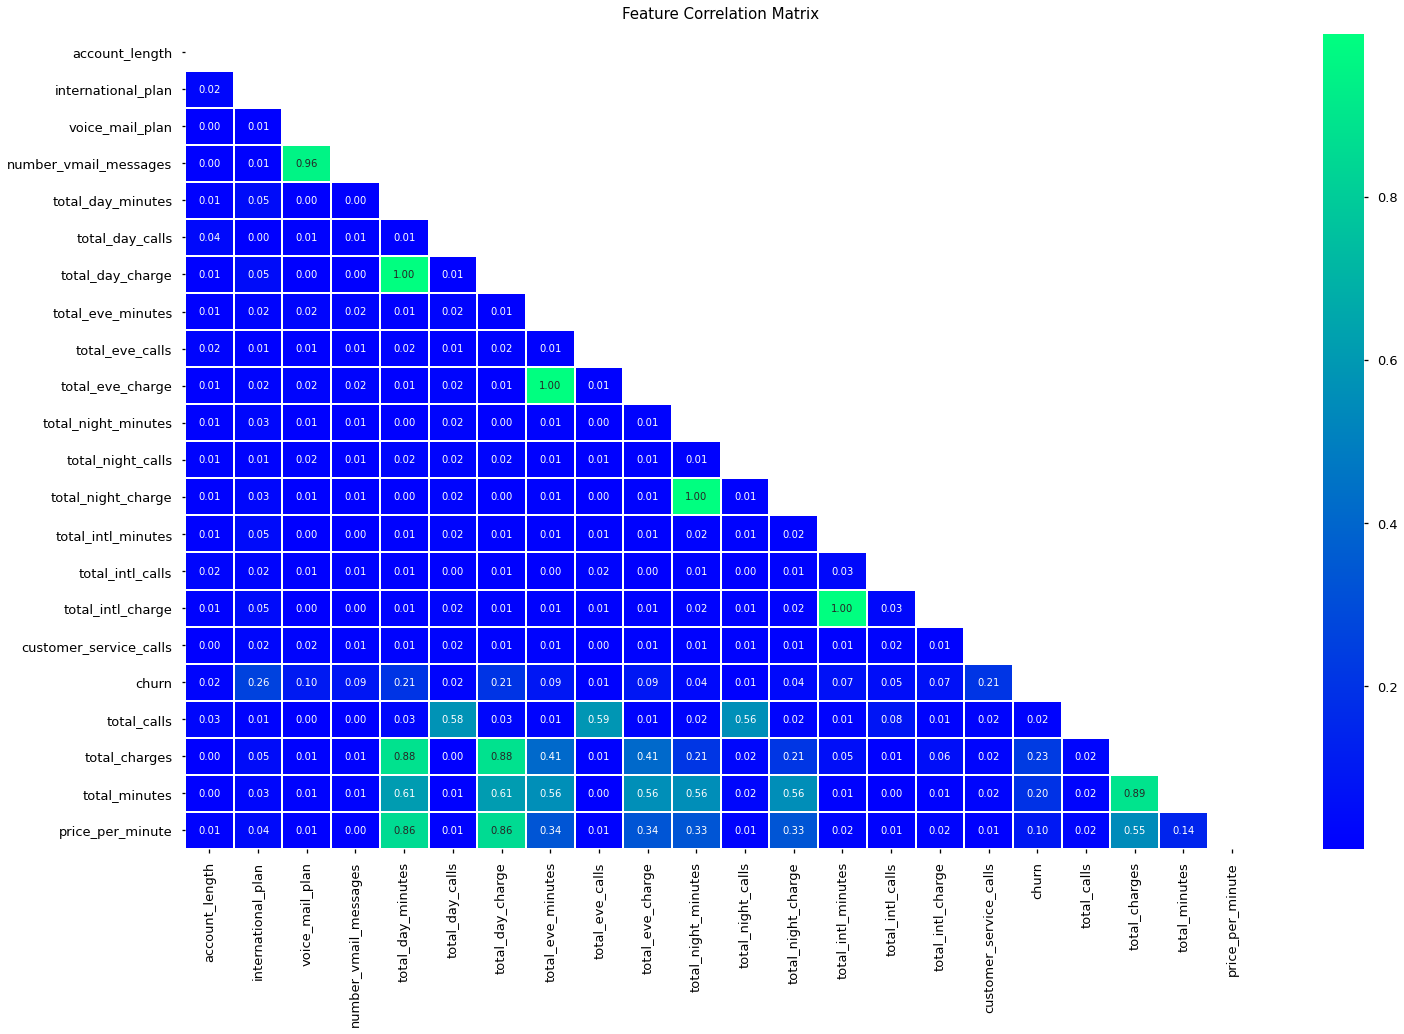

In [146]:
# Creating a heatmap to look at colinearity and potential categories that will lead to churn prediction.

corr = df.corr().abs()

fix, ax = plt.subplots(figsize = (24,15))
matrix = np.triu(corr)
ax.set_title('Feature Correlation Matrix', pad=15, fontsize=15)
heatmap = sns.heatmap(corr, annot=True, cmap='winter', fmt='.2f', mask=matrix, linewidths=1)
plt.show()

Charges and total minutes are perfectly correlated, which makes sense.  Also the number of voicemail messages, and the voice mail plan category are also highly correlated.  Meaning if they purchased the plan, it is highly likely that they used it.  Day minutes were highly correlated with the total minutes vs evening minutes.  It looks like churn had the highest correlation with the international plan (which we identified as a possibility earlier).  Total day minutes, total day charges, and customer service calls.  Customer service calls could be related to the actual service that the customer experienced, or could be the fact that the customer had to call in to cancel their plan, thus driving that columns correlation higher.  

Going to drop the columns we added earlier, and columns that are dependent on another for its calculation (i.e. charges).  They are too dependent on the source features.

In [147]:
df = df.drop(['total_charges', 
         'total_intl_charge', 
         'total_eve_charge', 
         'total_day_charge', 
         'total_night_charge',
         'number_vmail_messages',
         'total_calls',
         'total_minutes',
         'price_per_minute'
        ],
         axis=1)

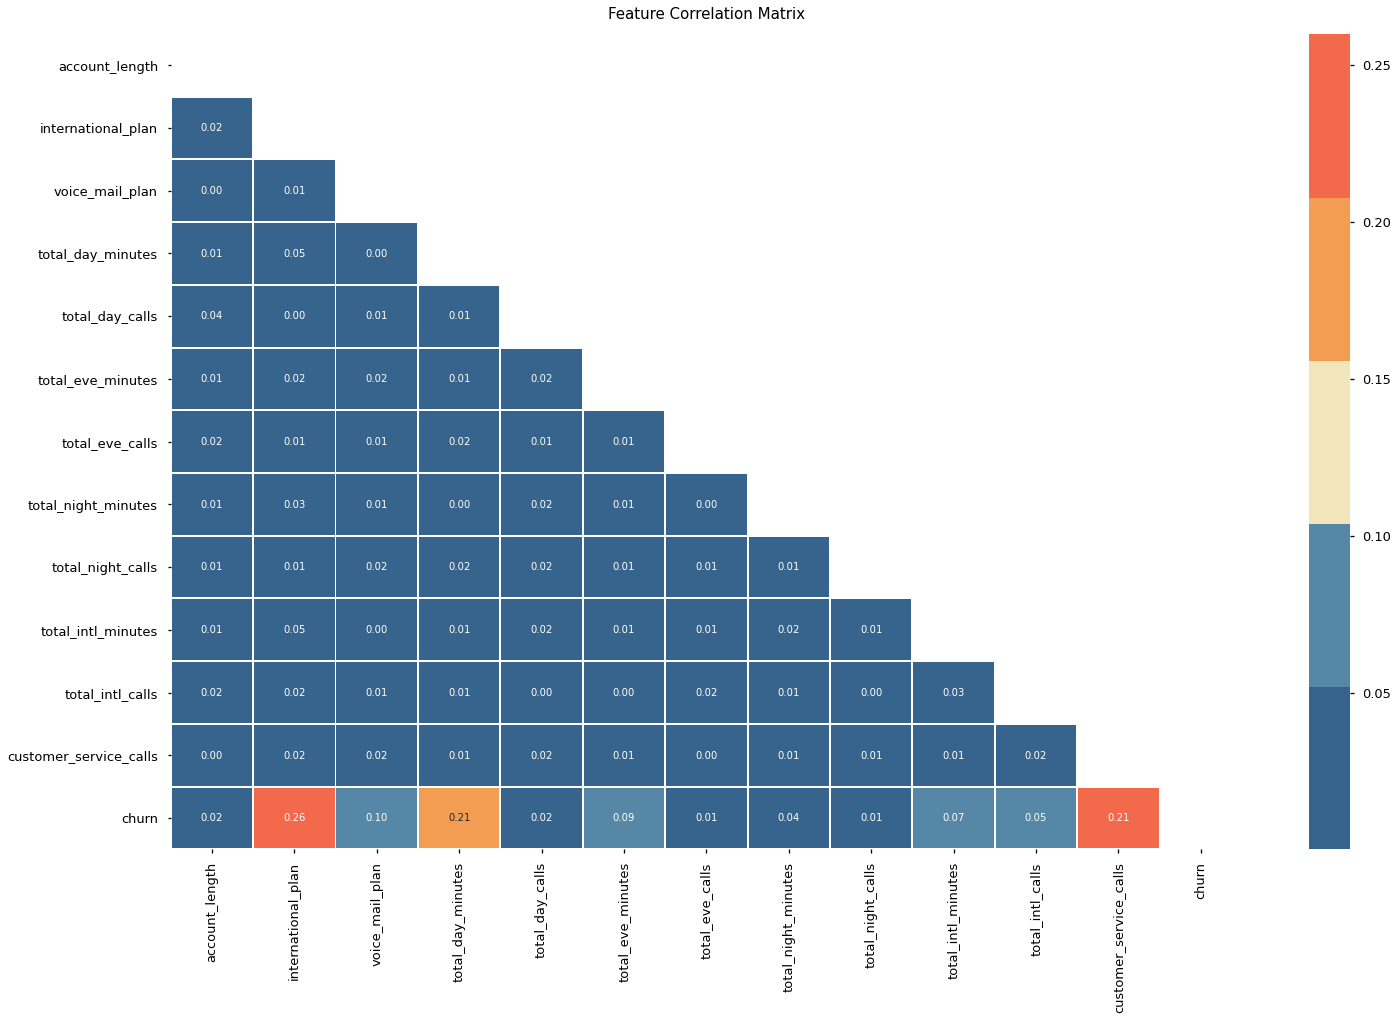

In [148]:
# Creating a heatmap to look at colinearity and potential categories that will lead to churn prediction.

corr = df.corr().abs()

fix, ax = plt.subplots(figsize = (24,15))
matrix = np.triu(corr)
ax.set_title('Feature Correlation Matrix', pad=15, fontsize=15)
heatmap = sns.heatmap(corr, annot=True, cmap=pal, fmt='.2f', mask=matrix, linewidths=1)
plt.show()

Looking much better.  Looks liek that international plan, the total day minutes, and customer serivce calls are all showing some correlation to our target variable of churn.

In [149]:
# Checking our target/ dataset for balance before creating our baseline classifcation model.

print('Raw Counts')
print(df['churn'].value_counts())
print()
print('Percentages')
print(df['churn'].value_counts(normalize=True))

Raw Counts
0    2850
1     483
Name: churn, dtype: int64

Percentages
0    0.855086
1    0.144914
Name: churn, dtype: float64


A baseline model that always chose the majority class would have an accuracy of over 85%. Therefore we will want to report additional metrics at the end.

# Classfication Modeling

In [150]:
# Quick look at our dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   object 
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   total_day_minutes       3333 non-null   float64
 5   total_day_calls         3333 non-null   int64  
 6   total_eve_minutes       3333 non-null   float64
 7   total_eve_calls         3333 non-null   int64  
 8   total_night_minutes     3333 non-null   float64
 9   total_night_calls       3333 non-null   int64  
 10  total_intl_minutes      3333 non-null   float64
 11  total_intl_calls        3333 non-null   int64  
 12  customer_service_calls  3333 non-null   int64  
 13  churn                   3333 non-null   int64  
 14  phone_number_prefix     3333 non-null   

In [151]:
# Situate target and non-target features

X = df.drop('churn', axis=1)
y = df['churn']

# Create splits

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [152]:
# Also looking at a dummy model with 5 cross validation folds.  Mean accuracy is about
# 86%.  This aligns with our assumption above with the imbalance of our churned 
# customer count.

dummy_model = DummyClassifier(strategy='most_frequent')

cv_results = cross_val_score(dummy_model, 
                             X_train, 
                             y_train, 
                             cv=5)

dummy_model.fit(X_train, y_train)

np.mean(cv_results)

0.8567430861723446

Case and point from our statement earlier, a most frequent model could capture around 86% of the correct cases.  With that being said, the metric we will be evaluating is recall.  Recall is calculated by taking the number of True Positives divided by the True Positives and the False Negative classes.  Recall is typically good when we want to limit false negatives.  For our use case, false negatives would be a customer that churned, and we didn't predict them to churn, thus never giving our partners in Customer Success the opportunity to "save" the client.


## Pipeline

In [153]:
# Saving a copy of our data frame to reference columns later.

df_X_train_copy_orig = X_train.iloc[:10]
df_X_train_copy_orig.head()

,account_length,area_code,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,phone_number_prefix
367,45,415,0,0,78.2,127,253.4,108,255.0,100,18.0,3,1,350
3103,115,415,0,0,195.9,111,227.0,108,313.2,113,13.2,1,2,415
549,121,408,0,1,237.1,63,205.6,117,196.7,85,10.1,5,4,364
2531,180,415,0,0,143.3,134,180.5,113,184.2,87,10.1,4,1,366
2378,112,510,0,0,206.2,122,164.5,94,140.3,101,12.6,7,3,396


In [154]:
# Labeling columns for different preprocessing steps

categorical_columns = ['area_code', 'phone_number_prefix']

numerical_columns = ['account_length', 'total_day_minutes', 
                     'total_day_calls', 'total_eve_minutes', 'total_eve_calls', 
                     'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
                     'customer_service_calls', 'total_night_minutes'
                    ]

binary_columns = ['international_plan', 'voice_mail_plan']

In [155]:
# Check to make sure we have all our columns accounted for

(len(categorical_columns)+len(numerical_columns)+len(binary_columns)) == (df.shape[1]-1)

True

In [156]:
# One Hot Encoding out categorical variables on our TRAINING data

categorical_Xtr_df = pd.DataFrame(X_train, columns=categorical_columns)

ohe = OneHotEncoder(drop='first',
                    sparse = False) 

ohe_data = ohe.fit_transform(categorical_Xtr_df)

# Dum dums

ohe_data_df = pd.DataFrame(ohe_data,
                     columns=ohe.get_feature_names(),
                     index=categorical_Xtr_df.index)#make sure to pass an index

clean_df = X_train.drop(categorical_Xtr_df, axis=1)

# Putting humpty back together again

X_train = pd.concat([clean_df, ohe_data_df], axis=1)

# Quick peek 
X_train.head()

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,...,x1_413,x1_414,x1_415,x1_416,x1_417,x1_418,x1_419,x1_420,x1_421,x1_422
367,45,0,0,78.2,127,253.4,108,255.0,100,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3103,115,0,0,195.9,111,227.0,108,313.2,113,13.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,121,0,1,237.1,63,205.6,117,196.7,85,10.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2531,180,0,0,143.3,134,180.5,113,184.2,87,10.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2378,112,0,0,206.2,122,164.5,94,140.3,101,12.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
# One Hot Encoding out categorical variables on our TEST data

categorical_Xts_df = pd.DataFrame(X_test, columns=categorical_columns)

ohe = OneHotEncoder(drop='first',
                    sparse = False) 

ohe_data = ohe.fit_transform(categorical_Xts_df)

# Dum dums

ohe_data_df = pd.DataFrame(ohe_data,
                     columns=ohe.get_feature_names(),
                     index=categorical_Xts_df.index)#make sure to pass an index

clean_df = X_test.drop(categorical_Xts_df, axis=1)

# Putting humpty back together again

X_test = pd.concat([clean_df, ohe_data_df], axis=1)

# Quick peek 
X_test.head()

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,...,x1_413,x1_414,x1_415,x1_416,x1_417,x1_418,x1_419,x1_420,x1_421,x1_422
438,113,0,0,155.0,93,330.6,106,189.4,123,13.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2674,67,0,0,109.1,117,217.4,124,188.4,141,12.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1345,98,0,0,0.0,0,159.6,130,167.1,88,6.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1957,147,0,0,212.8,79,204.1,91,156.2,113,10.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2148,96,0,0,144.0,102,224.7,73,227.7,91,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
# Saving a copy of our data frame to reference columns later.

df_X_train_copy = X_train.iloc[:10]

df_X_test_copy = X_test.iloc[:10]


In [159]:
# Scaling our data to prevent features from outweight others

SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

## SMOTE Work

In [160]:
# Let's take a quick look at that imbalance once more.

y_train.value_counts()

0    2141
1     358
Name: churn, dtype: int64

In [161]:
# Instantiating SMOTE 

sm = SMOTE(sampling_strategy='auto', random_state=42)

In [162]:
X_train, y_train = sm.fit_resample(X_train, y_train)

y_train.value_counts()

1    2141
0    2141
Name: churn, dtype: int64

# Logistic Regression Model

## Baseline Log Reg

In [163]:
# Baseline Logistic Regression model 
baseline_logreg = ImPipeline(steps=[('sm', SMOTE(random_state=42)),
                            ('estimator', LogisticRegression(random_state=42))])

# Train model
baseline_logreg.fit(X_train, y_train);

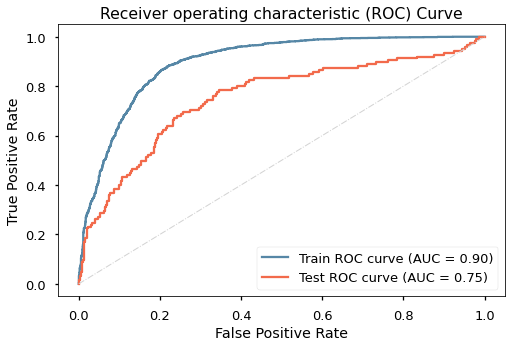

In [164]:
# Quick look at the performance of our baseline model.  We'll take a peek
# at the ROC curve first, even though our metric of interest is recall, and F1.
fig, ax2 = plt.subplots(figsize=(8,5))
plot_roc_curve(baseline_logreg, X_train, y_train, ax=ax2, name ='Train ROC curve', color=c("blue"))
plot_roc_curve(baseline_logreg, X_test, y_test, ax=ax2, name ='Test ROC curve', color=c("redorange") )
ax2.plot([0, 1], [0, 1], color='lightgray', lw=1, linestyle='-.')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver operating characteristic (ROC) Curve')
plt.show();


Looks like we have a bit of overfitting going on with our train and test sets.  Going to look at the confusion matrix for our model to check in on our Recall score.

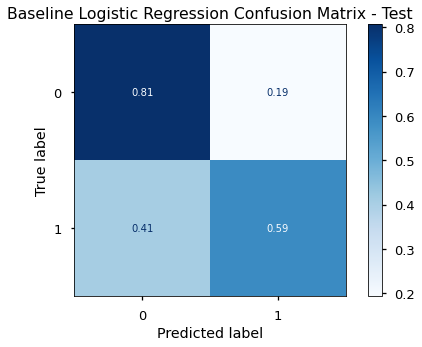

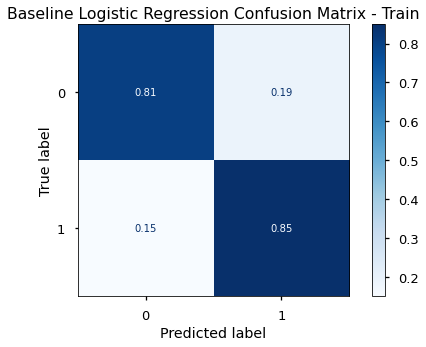

In [165]:
# Plotting confusion matrix for our baseline logistic regression - Test
fig, ax = plt.subplots(figsize=(8,5))

plot_confusion_matrix(baseline_logreg, X_test, y_test, ax=ax,  cmap='Blues', normalize='true') 
ax.set_title("Baseline Logistic Regression Confusion Matrix - Test");

# Plotting confusion matrix for our baseline logistic regression - Train
fig, ax = plt.subplots(figsize=(8,5))

plot_confusion_matrix(baseline_logreg, X_train, y_train, ax=ax,  cmap='Blues', normalize='true') 
ax.set_title("Baseline Logistic Regression Confusion Matrix - Train");

**NEED Analysis here!**

In [166]:
# Print classification Scores for the test set
y_pred = baseline_logreg.predict(X_test)
divider = ('-' * 60)
table = classification_report(y_test, y_pred, digits=3)

print('\n', 'Classification Report - Test', '\n')
print(divider) 
print(table) 



 Classification Report - Test 

------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.918     0.807     0.859       709
           1      0.351     0.592     0.440       125

    accuracy                          0.775       834
   macro avg      0.634     0.699     0.650       834
weighted avg      0.833     0.775     0.796       834



**Need analysis here!**

In [167]:
# Capture roc_auc for cross val, test, and train 
roc_score_train_cv = cross_val_score(estimator=baseline_logreg, X=X_train,  y=y_train, 
                                         cv=StratifiedKFold(shuffle=True), scoring='roc_auc').mean()

roc_score_train = roc_auc_score(y_train, baseline_logreg.predict_proba(X_train)[:, 1]) 
roc_score_test = roc_auc_score(y_test, baseline_logreg.predict_proba(X_test)[:, 1])
        
# Capture recall scores for test and train
recall_score_train = recall_score(y_train, baseline_logreg.predict(X_train))
recall_score_test = recall_score(y_test, baseline_logreg.predict(X_test))

f1_score_train = f1_score(y_train, baseline_logreg.predict(X_train))
f1_score_test = f1_score(y_test, baseline_logreg.predict(X_test))
        

print('\n', "Performance Comparison", '\n')
print(divider)    
print(f" Mean Cross Validated Roc_Auc Score: {roc_score_train_cv :.2%}")    
print(f" Train Roc_Auc Score: {roc_score_train :.2%}")  
print(f" Test Roc_Auc Score: {roc_score_test :.2%}")    
print(divider)
     
print(f" Train Recall score: {recall_score_train :.2%}")    
print(f" Test Recall score: {recall_score_test :.2%}")  
print(divider)

print(f" Train F1 score: {f1_score_train :.2%}")    
print(f" Test F1 score: {f1_score_test :.2%}")  
print(divider, '\n')


 Performance Comparison 

------------------------------------------------------------
 Mean Cross Validated Roc_Auc Score: 87.94%
 Train Roc_Auc Score: 89.58%
 Test Roc_Auc Score: 75.13%
------------------------------------------------------------
 Train Recall score: 84.91%
 Test Recall score: 59.20%
------------------------------------------------------------
 Train F1 score: 83.11%
 Test F1 score: 44.05%
------------------------------------------------------------ 



**Need analysis here!**

## Tuned Logisitic Regression model

In [174]:
# Parameters for our gridsearch, model optimization

parameters = {
    'estimator__penalty' : ['l1','l2'], 
    'estimator__fit_intercept':[True, False],
    'estimator__C'       : [0.001,0.01,0.1,0.5,1,10,100],
    'estimator__solver'  : ['newton-cg', 'lbfgs', 'liblinear'], 
    'estimator__max_iter'  : [50,100,200,300]  
}
      
# Create the grid, with "logreg_pipeline" as the estimator
best_logreg = GridSearchCV(estimator=baseline_logreg,   # model
                          param_grid=parameters,        
                          scoring='recall',             # my metric for scoring
                          cv=5,                         # default folds
                          n_jobs=-1                     
)                      


In [175]:
# Train the pipeline (tranformations & predictor)
best_logreg.fit(X_train, y_train);

# Let's take a look at our best parameters
best_logreg.best_params_

KeyboardInterrupt: 

In [ ]:
# plotting confusion matrix for our tuned logistic regression - Test
fig, ax = plt.subplots(figsize=(8,5))

plot_confusion_matrix(best_logreg, X_test, y_test, ax=ax,  cmap='Blues', normalize='true') 
ax.set_title("Baseline Logistic Regression Confusion Matrix - Test");

# plotting confusion matrix for our tuned logistic regression - Train
fig, ax = plt.subplots(figsize=(8,5))

plot_confusion_matrix(best_logreg, X_train, y_train, ax=ax,  cmap='Blues', normalize='true') 
ax.set_title("Baseline Logistic Regression Confusion Matrix - Train");

In [ ]:
# Print classification scores for the test set

y_pred = best_logreg.predict(X_test)
divider = ('-' * 60)
table = classification_report(y_test, y_pred, digits=3)

print('\n', 'Classification Report - Test', '\n')
print(divider) 
print(table) 

In [172]:
# Capture roc_auc for cross val, test, and train 
roc_score_train_cv = cross_val_score(estimator=best_logreg, X=X_train,  y=y_train, 
                                         cv=StratifiedKFold(shuffle=True), scoring='recall').mean()

roc_score_train = roc_auc_score(y_train, best_logreg.predict_proba(X_train)[:, 1]) 
roc_score_test = roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1])
        
# Capture recall scores for test and train
recall_score_train = recall_score(y_train, best_logreg.predict(X_train))
recall_score_test = recall_score(y_test, best_logreg.predict(X_test))

f1_score_train = f1_score(y_train, best_logreg.predict(X_train))
f1_score_test = f1_score(y_test, best_logreg.predict(X_test))
        

print('\n', "Performance Comparison", '\n')
print(divider)    
print(f" Mean Cross Validated Roc_Auc Score: {roc_score_train_cv :.2%}")    
print(f" Train Roc_Auc Score: {roc_score_train :.2%}")  
print(f" Test Roc_Auc Score: {roc_score_test :.2%}")    
print(divider)
     
print(f" Train Recall score: {recall_score_train :.2%}")    
print(f" Test Recall score: {recall_score_test :.2%}")  
print(divider)

print(f" Train F1 score: {f1_score_train :.2%}")    
print(f" Test F1 score: {f1_score_test :.2%}")  
print(divider, '\n')


 Performance Comparison 

------------------------------------------------------------
 Mean Cross Validated Roc_Auc Score: 94.77%
 Train Roc_Auc Score: 89.28%
 Test Roc_Auc Score: 77.98%
------------------------------------------------------------
 Train Recall score: 95.94%
 Test Recall score: 81.60%
------------------------------------------------------------
 Train F1 score: 81.59%
 Test F1 score: 40.96%
------------------------------------------------------------ 



# Build KNN Model

In [173]:
# Baseline KNN model 
baseline_logreg_knn = Pipeline([
    ("estimator", KNeighborsClassifier(random_state=42))
])
    
# Train model
baseline_knn_knn.fit(X_train, y_train);

TypeError: __init__() got an unexpected keyword argument 'random_state'

In [ ]:
# Relevant imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Creating the model
knn_baseline_model = KNeighborsClassifier()

# Perform cross-validation
knn_baseline_log_loss = -cross_val_score(knn_baseline_model, X_train_scaled, y_train, scoring="recall").mean()

knn_baseline_log_loss

In [ ]:
# Your code here (add more cells as needed)
# Adjusting the neighbors value to see if we are overfitting with the default = 5.
knn_second_model = KNeighborsClassifier(n_neighbors=25)

knn_second_log_loss = -cross_val_score(knn_second_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_second_log_loss

In [ ]:
# Your code here (add more cells as needed)
# Changing from Euclidean difference to manhattan difference
knn_3_model = KNeighborsClassifier(n_neighbors=25, metric="manhattan")

knn_3_log_loss = -cross_val_score(knn_3_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_3_log_loss

In [ ]:
# Adjusting the number of neighbors once again to see if we can increase performance.
knn_4_model = KNeighborsClassifier(n_neighbors=40, metric="manhattan")

knn_4_log_loss = -cross_val_score(knn_4_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_4_log_loss

In [ ]:
# Backtracking to see what increased neighbors looks like with Euclidean distance.
knn_5_model = KNeighborsClassifier(n_neighbors=40)

knn_5_log_loss = -cross_val_score(knn_5_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_5_log_loss

In [ ]:
# Backtracking to see what increased neighbors looks like with Euclidean distance.
knn_6_model = KNeighborsClassifier(n_neighbors=15)

knn_6_log_loss = -cross_val_score(knn_6_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_6_log_loss

# Decision Tree Model

## Baseline Decision Tree

In [ ]:
# Baseline model 
baseline_tree = ImPipeline(steps=[('sm', SMOTE(random_state=42)),
                            ('estimator', DecisionTreeClassifier(random_state=42))])

# Train model
baseline_tree.fit(X_train, y_train);

In [ ]:
# plotting confusion matrix for our baseline decision tree - Test
fig, ax = plt.subplots(figsize=(8,5))

plot_confusion_matrix(baseline_tree, X_test, y_test, ax=ax,  cmap='Blues', normalize='true') 
ax.set_title("Baseline Confusion Matrix - Test");

# plotting confusion matrix for our baseline decision tree - Train
fig, ax = plt.subplots(figsize=(8,5))

plot_confusion_matrix(baseline_tree, X_train, y_train, ax=ax,  cmap='Blues', normalize='true') 
ax.set_title("Baseline Confusion Matrix - Train");

In [ ]:
# Print classification Scores for the test set
y_pred = baseline_tree.predict(X_test)
divider = ('-' * 60)
table = classification_report(y_test, y_pred, digits=3)

print('\n', 'Classification Report - Test', '\n')
print(divider) 
print(table) 

In [ ]:
# Capture roc_auc for cross val, test, and train 
roc_score_train_cv = cross_val_score(estimator=baseline_tree, X=X_train,  y=y_train, 
                                         cv=StratifiedKFold(shuffle=True), scoring='recall').mean()

roc_score_train = roc_auc_score(y_train, baseline_tree.predict_proba(X_train)[:, 1]) 
roc_score_test = roc_auc_score(y_test, baseline_tree.predict_proba(X_test)[:, 1])
        
# Capture recall scores for test and train
recall_score_train = recall_score(y_train, baseline_tree.predict(X_train))
recall_score_test = recall_score(y_test, baseline_tree.predict(X_test))

f1_score_train = f1_score(y_train, baseline_tree.predict(X_train))
f1_score_test = f1_score(y_test, baseline_tree.predict(X_test))
        

print('\n', "Performance Comparison", '\n')
print(divider)    
print(f" Mean Cross Validated Roc_Auc Score: {roc_score_train_cv :.2%}")    
print(f" Train Roc_Auc Score: {roc_score_train :.2%}")  
print(f" Test Roc_Auc Score: {roc_score_test :.2%}")    
print(divider)
     
print(f" Train Recall score: {recall_score_train :.2%}")    
print(f" Test Recall score: {recall_score_test :.2%}")  
print(divider)

print(f" Train F1 score: {f1_score_train :.2%}")    
print(f" Test F1 score: {f1_score_test :.2%}")  
print(divider, '\n')

## Tuned Decision Tree Model

In [ ]:

parameters = {
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__max_depth': [None, 2, 3, 4, 5, 6],
    'estimator__max_features': [None, 15,  5],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 3, 4, 5, 6]
}
      
# Grid with our baseline tree as our estimator
best_tree = GridSearchCV(estimator=baseline_tree,    # model
                          param_grid=parameters,     # hyperparameters
                          scoring='recall',          # metric for scoring
                          cv=5,                      # number of folds for cross-validation
                          n_jobs=-1                  # 1 job per core of the computer.
)                      



In [ ]:
# Train the pipeline based on our most appropriate parameters
best_tree.fit(X_train, y_train);
best_tree.best_params_

In [ ]:
# Print classification Scores for the test set
y_pred = best_tree.predict(X_test)
divider = ('-' * 60)
table = classification_report(y_test, y_pred, digits=3)

print('\n', 'Classification Report - Test', '\n')
print(divider) 
print(table) 

In [ ]:
# Capture roc_auc for cross val, test, and train 
roc_score_train_cv = cross_val_score(estimator=best_tree, X=X_train,  y=y_train, 
                                         cv=StratifiedKFold(shuffle=True), scoring='recall').mean()

roc_score_train = roc_auc_score(y_train, baseline_tree.predict_proba(X_train)[:, 1]) 
roc_score_test = roc_auc_score(y_test, baseline_tree.predict_proba(X_test)[:, 1])
        
# Capture recall scores for test and train
recall_score_train = recall_score(y_train, best_tree.predict(X_train))
recall_score_test = recall_score(y_test, best_tree.predict(X_test))

f1_score_train = f1_score(y_train, best_tree.predict(X_train))
f1_score_test = f1_score(y_test, best_tree.predict(X_test))
        

print('\n', "Performance Comparison", '\n')
print(divider)    
print(f" Mean Cross Validated Roc_Auc Score: {roc_score_train_cv :.2%}")    
print(f" Train Roc_Auc Score: {roc_score_train :.2%}")  
print(f" Test Roc_Auc Score: {roc_score_test :.2%}")    
print(divider)
     
print(f" Train Recall score: {recall_score_train :.2%}")    
print(f" Test Recall score: {recall_score_test :.2%}")  
print(divider)

print(f" Train F1 score: {f1_score_train :.2%}")    
print(f" Test F1 score: {f1_score_test :.2%}")  
print(divider, '\n')

NameError: name 'best_tree' is not defined

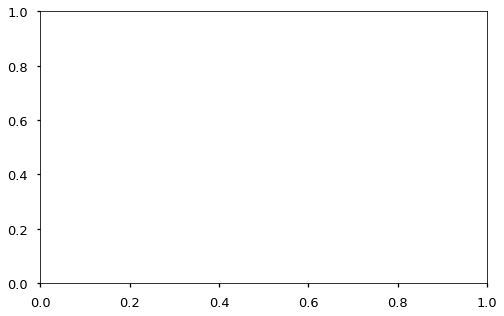

In [107]:
# plotting confusion matrix for our best decision tree - Test
fig, ax = plt.subplots(figsize=(8,5))

plot_confusion_matrix(best_tree, X_test, y_test, ax=ax,  cmap='Blues', normalize='true') 
ax.set_title("Baseline Confusion Matrix - Test");

# plotting confusion matrix for our best decision tree - Train
fig, ax = plt.subplots(figsize=(8,5))

plot_confusion_matrix(best_tree, X_train, y_train, ax=ax,  cmap='Blues', normalize='true') 
ax.set_title("Baseline Confusion Matrix - Train");

# Random Forest

## Baseline Forest

In [331]:
#
baseline_RF = ImPipeline(steps=[('sm', SMOTE(random_state=42)),
                            ('estimator', RandomForestClassifier(random_state=42))])

# Train model
baseline_RF.fit(X_train, y_train);

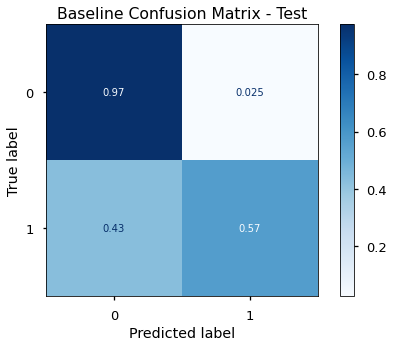

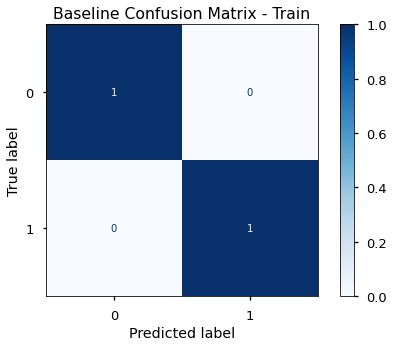

In [332]:
# plotting confusion matrix for our baseline Random Forest - Test
fig, ax = plt.subplots(figsize=(8,5))

plot_confusion_matrix(baseline_RF, X_test, y_test, ax=ax,  cmap='Blues', normalize='true') 
ax.set_title("Baseline Confusion Matrix - Test");

# plotting confusion matrix for our baseline Random Forest - Train
fig, ax = plt.subplots(figsize=(8,5))

plot_confusion_matrix(baseline_RF, X_train, y_train, ax=ax,  cmap='Blues', normalize='true') 
ax.set_title("Baseline Confusion Matrix - Train");

In [333]:
# Print classification Scores for the test set
y_pred = baseline_RF.predict(X_test)
divider = ('-' * 60)
table = classification_report(y_test, y_pred, digits=3)

print('\n', 'Classification Report - Test', '\n')
print(divider) 
print(table) 


 Classification Report - Test 

------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.928     0.975     0.950       709
           1      0.798     0.568     0.664       125

    accuracy                          0.914       834
   macro avg      0.863     0.771     0.807       834
weighted avg      0.908     0.914     0.907       834



In [334]:
# Capture roc_auc for cross val, test, and train 
roc_score_train_cv = cross_val_score(estimator=baseline_RF, X=X_train,  y=y_train, 
                                         cv=StratifiedKFold(shuffle=True), scoring='recall').mean()

roc_score_train = roc_auc_score(y_train, baseline_RF.predict_proba(X_train)[:, 1]) 
roc_score_test = roc_auc_score(y_test, baseline_RF.predict_proba(X_test)[:, 1])
        
# Capture recall scores for test and train
recall_score_train = recall_score(y_train, baseline_RF.predict(X_train))
recall_score_test = recall_score(y_test, baseline_RF.predict(X_test))

f1_score_train = f1_score(y_train, baseline_RF.predict(X_train))
f1_score_test = f1_score(y_test, baseline_RF.predict(X_test))
        

print('\n', "Performance Comparison", '\n')
print(divider)    
print(f" Mean Cross Validated Roc_Auc Score: {roc_score_train_cv :.2%}")    
print(f" Train Roc_Auc Score: {roc_score_train :.2%}")  
print(f" Test Roc_Auc Score: {roc_score_test :.2%}")    
print(divider)
     
print(f" Train Recall score: {recall_score_train :.2%}")    
print(f" Test Recall score: {recall_score_test :.2%}")  
print(divider)

print(f" Train F1 score: {f1_score_train :.2%}")    
print(f" Test F1 score: {f1_score_test :.2%}")  
print(divider, '\n')


 Performance Comparison 

------------------------------------------------------------
 Mean Cross Validated Roc_Auc Score: 95.33%
 Train Roc_Auc Score: 100.00%
 Test Roc_Auc Score: 91.01%
------------------------------------------------------------
 Train Recall score: 100.00%
 Test Recall score: 56.80%
------------------------------------------------------------
 Train F1 score: 100.00%
 Test F1 score: 66.36%
------------------------------------------------------------ 



## Tuned Forest

In [335]:
parameters = {
    'estimator__n_estimators': [150],                  # default=100 Number of trees. , Higher values prevent overfitting 
    'estimator__criterion': ['entropy', 'gini'],       # default = gini
    'estimator__max_depth': [6, 7, 8],                 # default = None, Lower depth prevents overfitting
    'estimator__max_features': [None, 5, 10, 15],      # default = None (n_features), Lower values prevent overfitting  
    'estimator__min_samples_split': [10, 20, 50],      # default = 2, Higher values prevent overfitting 
    'estimator__min_samples_leaf': [2, 4, 6]           # default = 1, Higher values prevent overfitting 
}     
        
best_RF = GridSearchCV(estimator=baseline_RF,   
                        param_grid=parameters,     
                        scoring='recall',          
                        cv=5,
                        n_jobs=-1)                      

best_RF.fit(X_train, y_train);

KeyboardInterrupt: 

In [ ]:
# Capture roc_auc for cross val, test, and train 
roc_score_train_cv = cross_val_score(estimator=best_RF, X=X_train,  y=y_train, 
                                         cv=StratifiedKFold(shuffle=True), scoring='recall').mean()

roc_score_train = roc_auc_score(y_train, best_RF.predict_proba(X_train)[:, 1]) 
roc_score_test = roc_auc_score(y_test, best_RF.predict_proba(X_test)[:, 1])
        
# Capture recall scores for test and train
recall_score_train = recall_score(y_train, best_RF.predict(X_train))
recall_score_test = recall_score(y_test, best_RF.predict(X_test))

f1_score_train = f1_score(y_train, best_RF.predict(X_train))
f1_score_test = f1_score(y_test, best_RF.predict(X_test))
        

print('\n', "Performance Comparison", '\n')
print(divider)    
print(f" Mean Cross Validated Roc_Auc Score: {roc_score_train_cv :.2%}")    
print(f" Train Roc_Auc Score: {roc_score_train :.2%}")  
print(f" Test Roc_Auc Score: {roc_score_test :.2%}")    
print(divider)
     
print(f" Train Recall score: {recall_score_train :.2%}")    
print(f" Test Recall score: {recall_score_test :.2%}")  
print(divider)

print(f" Train F1 score: {f1_score_train :.2%}")    
print(f" Test F1 score: {f1_score_test :.2%}")  
print(divider, '\n')

# Build Another Model (XGBoost, other?)

## Baseline XGBoost

In [ ]:
baseline_xgb = Pipeline([
    ("preprocessor", preprocessor),
    ('estimator', XGBClassifier(objective="binary:logistic", random_state=42))
])

# Train model
baseline_xgb.fit(X_train, y_train);

## Tuned XGBoost

In [ ]:
parameters = {
    "estimator__n_estimators": [75],              # default = 100, To avoid overfitting use "fewer" trees unlike RF.
    "estimator__learning_rate": [0.05, 0.1, 0.2], # default = 0.3, Lower ratios avoid over-fitting. If you reduce the learning rate in your XGBoost model, your model will also be less likely to overfit. 
    "estimator__max_depth": [4, 5, 6],            # default = 6, It is used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
    'estimator__gamma': [0.5, 1],                 # default = 0 , Larger values avoid over-fitting.
    'estimator__min_child_weight': [3, 4, 5],     # default = 1, Larger values avoid over-fitting. The larger min_child_weight is, the more conservative the algorithm will be. 
    'estimator__subsample': [0.5, 0.75],          # default = 1, Lower ratios avoid over-fitting.
    'estimator__colsample_bytree':[0.5, 0.75]     # default = 1, Lower ratios avoid over-fitting.
}

best_xgb = GridSearchCV(estimator=baseline_xgb,       
                        param_grid=parameters,     
                        scoring='roc_auc',          
                        cv=5,
                        n_jobs=-1
)                      

# Train the pipeline (tranformations & predictor)ui0
best_xgb.fit(X_train, y_train);

# Gradient Boosting

In [ ]:
GradientBoostingClassifier()

https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boostingb

In [ ]:
AdaBoostClassifier()

https://scikit-learn.org/stable/modules/ensemble.html#adaboost

# Model Evalution

## Comparison between Models

# Final Model